In [1]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics.pairwise import cosine_similarity

import os
import zipfile
import cv2
import shutil
import random
from PIL import Image


import warnings
warnings.filterwarnings("ignore")

import sys
print("Python Version: ", sys.version)
print("Tensorflow Version: ", tf.__version__)

# DEFINED
BATCH_SIZE = 32
IMG_WIDTH  = 224
IMG_HEIGHT = 224

%matplotlib inline
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Python Version:  3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Tensorflow Version:  2.16.1


In [3]:
# Load model
model = keras.models.load_model("../TrainingModels/furniture_classification_vgg19.keras")

In [4]:
furniture_df = pd.read_csv("../furniture_data.csv")
shuffled_furniture_df = furniture_df.sample(frac=1).reset_index(drop=True)

shutil.copy(shuffled_furniture_df['Image_Path'].iloc[0], "../ImageTesting/Task2")

'../ImageTesting/Task2\\10179modern-indoor-pub-and-bistro-tables.jpg'

Please Input Your Image Location:  C:\Users\ADMIN\Desktop\FurnitureClassificationRecommendation-main\Furniture_Data\tables\Farmhouse\29726farmhouse-side-tables-and-end-tables.jpg


C:\Users\ADMIN\Desktop\FurnitureClassificationRecommendation-main\Furniture_Data\tables\Farmhouse\29726farmhouse-side-tables-and-end-tables.jpg is a .jpg file


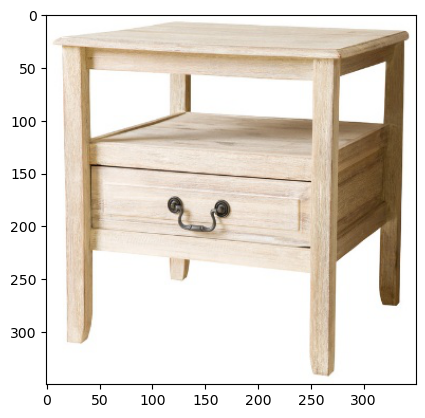

In [14]:
input_image_path = input("Please Input Your Image Location: ")
input_image_path.replace('\\', '/')

# Get the file extension from the file path
file_ext = os.path.splitext(input_image_path)[1]

# Check if the file extension is ".jpg"
if file_ext.lower() == ".jpg":
    correct_image_path = input_image_path
    plt.imshow(Image.open(input_image_path))
    print(f"{input_image_path} is a .jpg file")
else:
    print(f"{input_image_path} is not a .jpg file")

In [15]:
def prepare(filepath):
    img_array = cv2.cvtColor(cv2.imread(filepath), cv2.COLOR_BGR2RGB)
    new_array = cv2.resize(img_array, (IMG_WIDTH, IMG_HEIGHT))
    return np.expand_dims(new_array, axis=0).repeat(BATCH_SIZE, axis=0)

dataset_categories = furniture_df["Furniture_Category"].unique()

# Predict input flower image
prediction = model.predict(prepare(correct_image_path))

predicted_class_index = np.argmax(prediction, axis=1)

# Get type of flower data with in the same from user flower input and reset index after getting all items
types_predict_dataset = furniture_df[furniture_df['Furniture_Category'] == dataset_categories[predicted_class_index[0]]]['Image_Path']
types_predict_dataset.reset_index(inplace=True, drop=True)

types_predict_dataset

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


0                     ../Furniture_Data\tables\Asian\1.jpg
1        ../Furniture_Data\tables\Asian\17599asian-side...
2        ../Furniture_Data\tables\Asian\17600asian-side...
3        ../Furniture_Data\tables\Asian\17601asian-dini...
4        ../Furniture_Data\tables\Asian\17602asian-side...
                               ...                        
17095    ../Furniture_Data\tables\Victorian\5victorian-...
17096    ../Furniture_Data\tables\Victorian\6victorian-...
17097    ../Furniture_Data\tables\Victorian\7victorian-...
17098    ../Furniture_Data\tables\Victorian\8victorian-...
17099    ../Furniture_Data\tables\Victorian\9victorian-...
Name: Image_Path, Length: 17100, dtype: object

In [16]:
# Load the input flower image and convert it to a 1D Numpy array
input_image = Image.open(correct_image_path).convert('RGB')
input_image = input_image.resize((IMG_WIDTH, IMG_HEIGHT))
input_vector = np.array(input_image).ravel().reshape(1,-1)

# Load the dataset of flower images, resize them to the same size as the input image, and convert them to 1D Numpy arrays
dataset = []
for path in types_predict_dataset:
    img = Image.open(path).convert('RGB')
    img = img.resize((IMG_WIDTH, IMG_HEIGHT)) # Use the same size as the input image
    img_array = np.array(img).ravel()
    dataset.append(img_array)

dataset_vectors = np.array(dataset)

In [17]:
dataset_vectors

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [18]:
input_vector

array([[255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [19]:
# Handle memory error due to attempting to allocate a large amount of memory for the cosine similarity calculation.

# Define batch size for processing
batch_size = 1000  # You can adjust this value based on available memory

# Calculate the number of batches
num_batches = len(dataset_vectors) // batch_size
if len(dataset_vectors) % batch_size != 0:
    num_batches += 1

# Initialize an empty array to store similarity scores
similarity_scores = np.zeros((len(input_vector), len(dataset_vectors)))

# Calculate similarity scores batch-wise
for i in range(num_batches):
    start_index = i * batch_size
    end_index = min((i + 1) * batch_size, len(dataset_vectors))
    
    # Calculate similarity scores for the current batch
    batch_similarity = cosine_similarity(input_vector, dataset_vectors[start_index:end_index])
    
    # Store the similarity scores in the result array
    similarity_scores[:, start_index:end_index] = batch_similarity

In [20]:
flattened_similarity_scores = similarity_scores.flatten()

flattened_similarity_scores

array([0.96885121, 0.95511837, 0.81701858, ..., 0.87334034, 0.92141107,
       0.91125902])

Image Path: ../Furniture_Data\tables\Farmhouse\29726farmhouse-side-tables-and-end-tables.jpg
Similarity Score: 1.0000000000000646
Image Path: ../Furniture_Data\tables\Traditional\14181traditional-side-tables-and-end-tables.jpg
Similarity Score: 0.9741782634868676
Image Path: ../Furniture_Data\tables\Traditional\43050traditional-coffee-tables.jpg
Similarity Score: 0.9733821710720876
Image Path: ../Furniture_Data\tables\Mediterranean\40006mediterranean-coffee-tables.jpg
Similarity Score: 0.9732001693443584
Image Path: ../Furniture_Data\tables\Modern\12505modern-outdoor-coffee-tables.jpg
Similarity Score: 0.9727804281295581
Image Path: ../Furniture_Data\tables\Contemporary\1188contemporary-side-tables-and-end-tables.jpg
Similarity Score: 0.9727215683896957
Image Path: ../Furniture_Data\tables\Contemporary\2238contemporary-console-tables.jpg
Similarity Score: 0.9724078103513888
Image Path: ../Furniture_Data\tables\Modern\9050modern-side-tables-and-end-tables.jpg
Similarity Score: 0.9721883

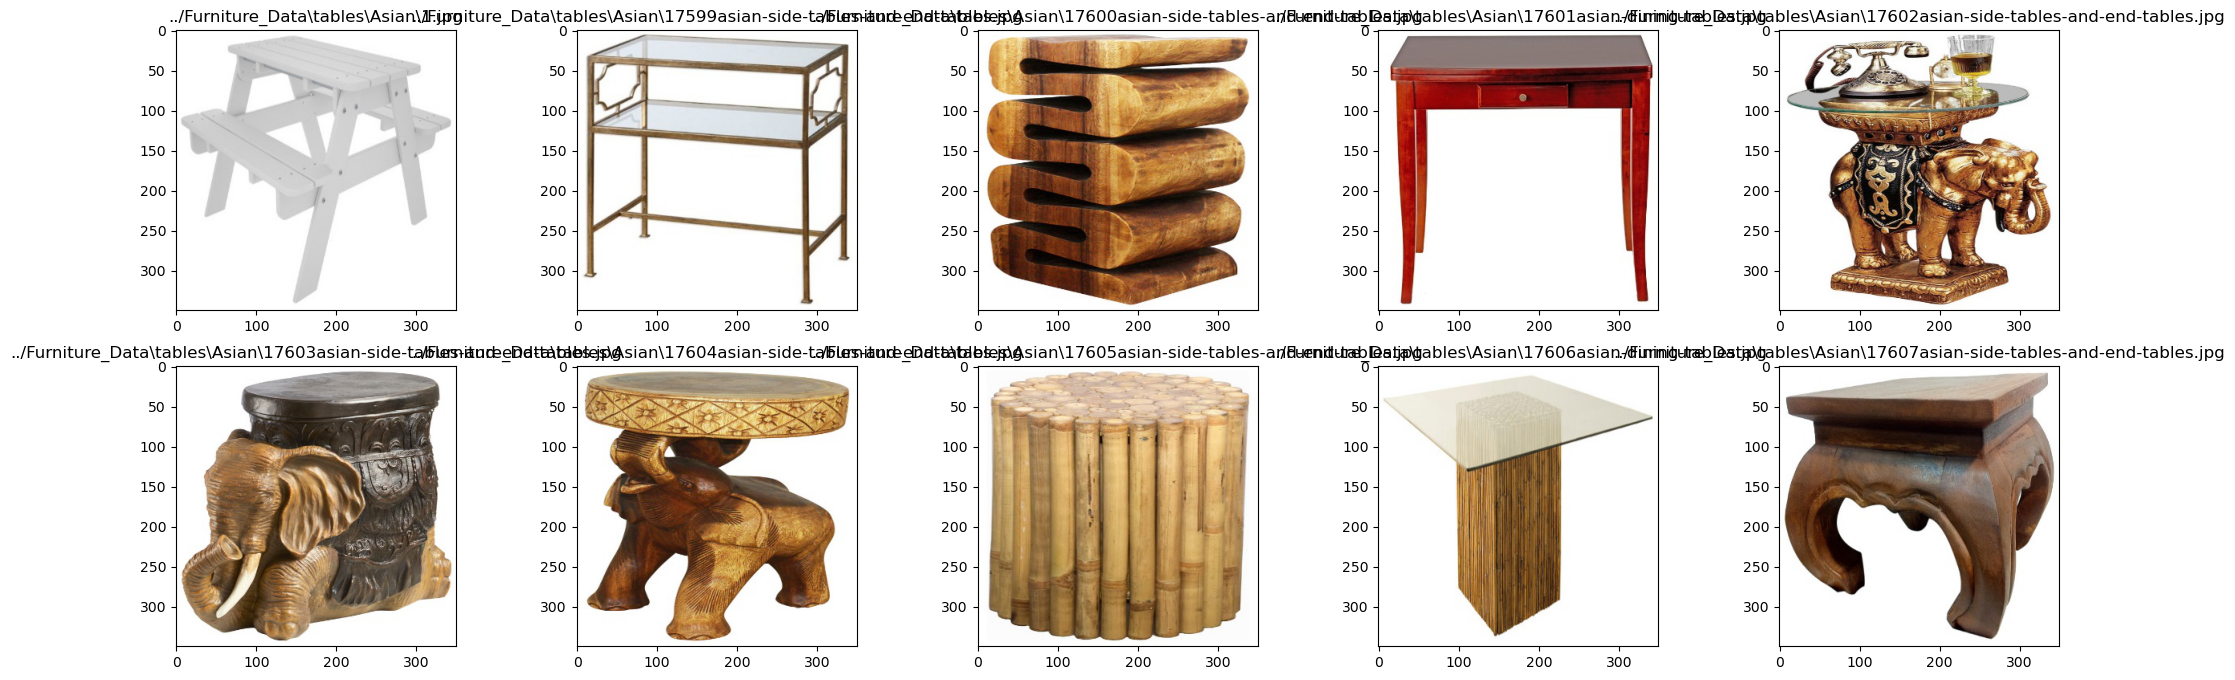

In [21]:
# Get indices of the top 10 most similar vectors
top_indices = np.argsort(similarity_scores.ravel())[::-1][:10]

# Get similarity scores corresponding to the top indices
top_similarity_scores = similarity_scores.ravel()[top_indices]

# Get paths of the top 10 most similar images
top_paths = types_predict_dataset.iloc[top_indices]

# Print the top 10 most similar images and their similarity scores
for path, score in zip(top_paths, top_similarity_scores):
    print("Image Path:", path)
    print("Similarity Score:", score)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25,8))

for i, ax in enumerate(axes.flat):
    ax.imshow(Image.open(types_predict_dataset[i]))
    ax.set_title(types_predict_dataset[i])
plt.show()